In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Loading training data
df1 = pd.read_csv('blackFriday_train.csv')
df1.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

In [12]:
print(df1.shape)

(550068, 12)


In [9]:
# Loading test dataset
df2 = pd.read_csv('blackFriday_test.csv')
df2.head()

User_ID Product_ID Gender    Age  Occupation City_Category  \
0  1000004  P00128942      M  46-50           7             B   
1  1000009  P00113442      M  26-35          17             C   
2  1000010  P00288442      F  36-45           1             B   
3  1000010  P00145342      F  36-45           1             B   
4  1000011  P00053842      F  26-35           1             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               1                   1   
1                          0               0                   3   
2                         4+               1                   5   
3                         4+               1                   4   
4                          1               0                   4   

   Product_Category_2  Product_Category_3  
0                11.0                 NaN  
1                 5.0                 NaN  
2                14.0                 NaN  
3                 9.0                 NaN  
4                 5.0                12.0

In [13]:
df2.shape

(233599, 11)

In [14]:
df = df1.append(df2, sort=False)
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN    8370.0  
1                 6.0                14.0   15200.0  
2                 NaN                 NaN    1422.0  
3                14.0                 NaN    1057.0  
4                 NaN                 NaN    7969.0

In [15]:
df.shape

(783667, 12)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [17]:
df.describe()

User_ID     Occupation  Marital_Status  Product_Category_1  \
count  7.836670e+05  783667.000000   783667.000000       783667.000000   
mean   1.003029e+06       8.079300        0.409777            5.366196   
std    1.727267e+03       6.522206        0.491793            3.878160   
min    1.000001e+06       0.000000        0.000000            1.000000   
25%    1.001519e+06       2.000000        0.000000            1.000000   
50%    1.003075e+06       7.000000        0.000000            5.000000   
75%    1.004478e+06      14.000000        1.000000            8.000000   
max    1.006040e+06      20.000000        1.000000           20.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       537685.000000       237858.000000  550068.000000  
mean             9.844506           12.668605    9263.968713  
std              5.089093            4.125510    5023.065394  
min              2.000000            3.000000      12.000000  
25%              5.000000            9.000000    5823.000000  
50%              9.000000           14.000000    8047.000000  
75%             15.000000           16.000000   12054.000000  
max             18.000000           18.000000   23961.000000

In [22]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [26]:
obj = df.dtypes[df.dtypes == 'object'].index
df[obj].describe()

Product_ID  Gender     Age City_Category Stay_In_Current_City_Years
count      783667  783667  783667        783667                     783667
unique       3677       2       7             3                          5
top     P00265242       M   26-35             B                          1
freq         2709  590031  313015        329739                     276425

In [27]:
df.drop(['User_ID'], axis = 1, inplace=True)

In [28]:
df.head()

Product_ID Gender   Age  Occupation City_Category  \
0  P00069042      F  0-17          10             A   
1  P00248942      F  0-17          10             A   
2  P00087842      F  0-17          10             A   
3  P00085442      F  0-17          10             A   
4  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN    8370.0  
1                 6.0                14.0   15200.0  
2                 NaN                 NaN    1422.0  
3                14.0                 NaN    1057.0  
4                 NaN                 NaN    7969.0

In [29]:
df['Gender']

0         F
1         F
2         F
3         F
4         M
         ..
233594    F
233595    F
233596    F
233597    F
233598    F
Name: Gender, Length: 783667, dtype: object

In [30]:
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})
df['Gender'].head(10)

0    0
1    0
2    0
3    0
4    1
5    1
6    1
7    1
8    1
9    1
Name: Gender, dtype: int64

In [31]:
df.head()

Product_ID  Gender   Age  Occupation City_Category  \
0  P00069042       0  0-17          10             A   
1  P00248942       0  0-17          10             A   
2  P00087842       0  0-17          10             A   
3  P00085442       0  0-17          10             A   
4  P00285442       1   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN    8370.0  
1                 6.0                14.0   15200.0  
2                 NaN                 NaN    1422.0  
3                14.0                 NaN    1057.0  
4                 NaN                 NaN    7969.0

In [33]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [34]:
df['Age']=df['Age'].map({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7 })

In [35]:
df.head()

Product_ID  Gender  Age  Occupation City_Category  \
0  P00069042       0    1          10             A   
1  P00248942       0    1          10             A   
2  P00087842       0    1          10             A   
3  P00085442       0    1          10             A   
4  P00285442       1    7          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN    8370.0  
1                 6.0                14.0   15200.0  
2                 NaN                 NaN    1422.0  
3                14.0                 NaN    1057.0  
4                 NaN                 NaN    7969.0

In [36]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [37]:
city = pd.get_dummies(df['City_Category'],drop_first=True)
city

B  C
0       0  0
1       0  0
2       0  0
3       0  0
4       0  1
...    .. ..
233594  1  0
233595  1  0
233596  1  0
233597  0  1
233598  1  0

[783667 rows x 2 columns]

In [38]:
df = pd.concat([df, city], axis=1)
df.head()

Product_ID  Gender  Age  Occupation City_Category  \
0  P00069042       0    1          10             A   
1  P00248942       0    1          10             A   
2  P00087842       0    1          10             A   
3  P00085442       0    1          10             A   
4  P00285442       1    7          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  B  C  
0                 NaN                 NaN    8370.0  0  0  
1                 6.0                14.0   15200.0  0  0  
2                 NaN                 NaN    1422.0  0  0  
3                14.0                 NaN    1057.0  0  0  
4                 NaN                 NaN    7969.0  0  1

In [39]:
df.tail()

Product_ID  Gender  Age  Occupation City_Category  \
233594  P00118942       0    3          15             B   
233595  P00254642       0    3          15             B   
233596  P00031842       0    3          15             B   
233597  P00124742       0    5           1             C   
233598  P00316642       0    5           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
233594                         4+               1                   8   
233595                         4+               1                   5   
233596                         4+               1                   1   
233597                         4+               0                  10   
233598                         4+               1                   4   

        Product_Category_2  Product_Category_3  Purchase  B  C  
233594                 NaN                 NaN       NaN  1  0  
233595                 8.0                 NaN       NaN  1  0  
233596                 5.0                12.0       NaN  1  0  
233597                16.0                 NaN       NaN  0  1  
233598                 5.0                 NaN       NaN  1  0

In [40]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

<AxesSubplot:>

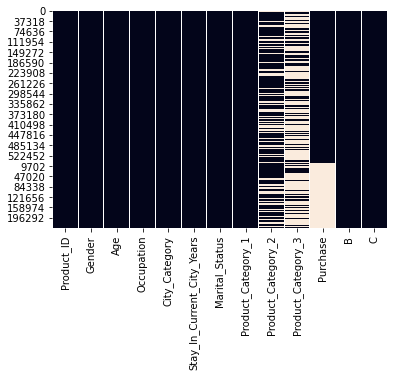

In [41]:
sns.heatmap(df.isnull(), cbar=False)

In [42]:
df.Product_Category_1.unique()  

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [43]:
df.Product_Category_2.unique()  

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [44]:
df.Product_Category_3.unique()  

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [45]:
df.Product_Category_2.value_counts()  

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [46]:
df.Product_Category_1.mode()

0    5
dtype: int64

In [50]:
df.cat2.mode()

0    8.0
dtype: float64

In [47]:
df.rename(columns = {'Product_Category_1':'cat1','Product_Category_2':'cat2', 'Product_Category_3':'cat3'}, inplace=True)

In [48]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'cat1', 'cat2', 'cat3',
       'Purchase', 'B', 'C'],
      dtype='object')

In [51]:
df['cat2'] = df['cat2'].fillna(df['cat2'].mode()[0])

In [54]:
df['cat3'] = df['cat3'].fillna(df['cat3'].mode()[0])

In [55]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
cat1                               0
cat2                               0
cat3                               0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [56]:
df['Purchase'] = df['Purchase'].fillna(df['Purchase'].mean())

In [57]:
df.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
cat1                          0
cat2                          0
cat3                          0
Purchase                      0
B                             0
C                             0
dtype: int64

In [58]:
df.head()

Product_ID  Gender  Age  Occupation City_Category  \
0  P00069042       0    1          10             A   
1  P00248942       0    1          10             A   
2  P00087842       0    1          10             A   
3  P00085442       0    1          10             A   
4  P00285442       1    7          16             C   

  Stay_In_Current_City_Years  Marital_Status  cat1  cat2  cat3  Purchase  B  C  
0                          2               0     3   8.0  16.0    8370.0  0  0  
1                          2               0     1   6.0  14.0   15200.0  0  0  
2                          2               0    12   8.0  16.0    1422.0  0  0  
3                          2               0    12  14.0  16.0    1057.0  0  0  
4                         4+               0     8   8.0  16.0    7969.0  0  1

In [59]:
df.drop(['City_Category'], axis = 1, inplace = True)

In [60]:
df.head()

Product_ID  Gender  Age  Occupation Stay_In_Current_City_Years  \
0  P00069042       0    1          10                          2   
1  P00248942       0    1          10                          2   
2  P00087842       0    1          10                          2   
3  P00085442       0    1          10                          2   
4  P00285442       1    7          16                         4+   

   Marital_Status  cat1  cat2  cat3  Purchase  B  C  
0               0     3   8.0  16.0    8370.0  0  0  
1               0     1   6.0  14.0   15200.0  0  0  
2               0    12   8.0  16.0    1422.0  0  0  
3               0    12  14.0  16.0    1057.0  0  0  
4               0     8   8.0  16.0    7969.0  0  1

In [61]:
df.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [62]:
df['Stay_In_Current_City_Years']=df.Stay_In_Current_City_Years.str.replace('+','') # replacing + with blank

In [63]:
df.Stay_In_Current_City_Years.unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [64]:
df.head()

Product_ID  Gender  Age  Occupation Stay_In_Current_City_Years  \
0  P00069042       0    1          10                          2   
1  P00248942       0    1          10                          2   
2  P00087842       0    1          10                          2   
3  P00085442       0    1          10                          2   
4  P00285442       1    7          16                          4   

   Marital_Status  cat1  cat2  cat3  Purchase  B  C  
0               0     3   8.0  16.0    8370.0  0  0  
1               0     1   6.0  14.0   15200.0  0  0  
2               0    12   8.0  16.0    1422.0  0  0  
3               0    12  14.0  16.0    1057.0  0  0  
4               0     8   8.0  16.0    7969.0  0  1

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   cat1                        783667 non-null  int64  
 7   cat2                        783667 non-null  float64
 8   cat3                        783667 non-null  float64
 9   Purchase                    783667 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


In [69]:
df.duplicated().sum()

15967

In [70]:
df3 = df.copy()

In [71]:
df3.head()

Product_ID  Gender  Age  Occupation Stay_In_Current_City_Years  \
0  P00069042       0    1          10                          2   
1  P00248942       0    1          10                          2   
2  P00087842       0    1          10                          2   
3  P00085442       0    1          10                          2   
4  P00285442       1    7          16                          4   

   Marital_Status  cat1  cat2  cat3  Purchase  B  C  
0               0     3   8.0  16.0    8370.0  0  0  
1               0     1   6.0  14.0   15200.0  0  0  
2               0    12   8.0  16.0    1422.0  0  0  
3               0    12  14.0  16.0    1057.0  0  0  
4               0     8   8.0  16.0    7969.0  0  1

In [72]:
df3.drop_duplicates(keep='first', inplace=True)

In [74]:
import pandas_profiling

In [76]:
df3.profile_report()

In [78]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [79]:
df.dtypes

Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years      int32
Marital_Status                  int64
cat1                            int64
cat2                          float64
cat3                          float64
Purchase                      float64
B                               int32
C                               int32
dtype: object

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   cat1                        783667 non-null  int64  
 7   cat2                        783667 non-null  float64
 8   cat3                        783667 non-null  float64
 9   Purchase                    783667 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


In [81]:
df.describe()

Gender            Age     Occupation  Stay_In_Current_City_Years  \
count  783667.00000  783667.000000  783667.000000               783667.000000   
mean        0.75291       3.496802       8.079300                    1.858247   
std         0.43132       1.352736       6.522206                    1.288790   
min         0.00000       1.000000       0.000000                    0.000000   
25%         1.00000       3.000000       2.000000                    1.000000   
50%         1.00000       3.000000       7.000000                    2.000000   
75%         1.00000       4.000000      14.000000                    3.000000   
max         1.00000       7.000000      20.000000                    4.000000   

       Marital_Status           cat1           cat2           cat3  \
count   783667.000000  783667.000000  783667.000000  783667.000000   
mean         0.409777       5.366196       9.265541      14.988858   
std          0.491793       3.878160       4.301427       2.740792   
min          0.000000       1.000000       2.000000       3.000000   
25%          0.000000       1.000000       8.000000      16.000000   
50%          0.000000       5.000000       8.000000      16.000000   
75%          1.000000       8.000000      14.000000      16.000000   
max          1.000000      20.000000      18.000000      18.000000   

            Purchase              B              C  
count  783667.000000  783667.000000  783667.000000  
mean     9263.968713       0.420764       0.310954  
std      4208.342958       0.493682       0.462884  
min        12.000000       0.000000       0.000000  
25%      6996.000000       0.000000       0.000000  
50%      9263.968713       0.000000       0.000000  
75%      9927.000000       1.000000       1.000000  
max     23961.000000       1.000000       1.000000

In [82]:
df_i = df.copy()

# Dropping the unnecessary field.
df_i.drop('Product_ID',axis=1,inplace=True)

In [83]:
df_i.head(10)

Gender  Age  Occupation  Stay_In_Current_City_Years  Marital_Status  cat1  \
0       0    1          10                           2               0     3   
1       0    1          10                           2               0     1   
2       0    1          10                           2               0    12   
3       0    1          10                           2               0    12   
4       1    7          16                           4               0     8   
5       1    3          15                           3               0     1   
6       1    5           7                           2               1     1   
7       1    5           7                           2               1     1   
8       1    5           7                           2               1     1   
9       1    3          20                           1               1     8   

   cat2  cat3  Purchase  B  C  
0   8.0  16.0    8370.0  0  0  
1   6.0  14.0   15200.0  0  0  
2   8.0  16.0    1422.0  0  0  
3  14.0  16.0    1057.0  0  0  
4   8.0  16.0    7969.0  0  1  
5   2.0  16.0   15227.0  0  0  
6   8.0  17.0   19215.0  1  0  
7  15.0  16.0   15854.0  1  0  
8  16.0  16.0   15686.0  1  0  
9   8.0  16.0    7871.0  0  0

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

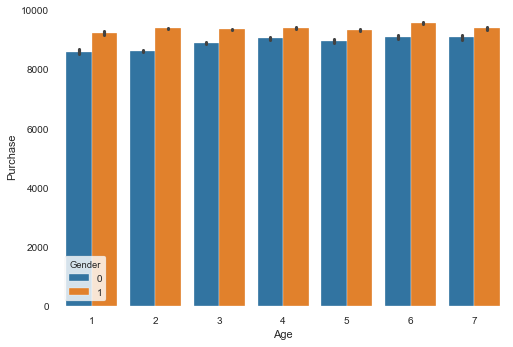

In [86]:
sns.barplot('Age','Purchase', hue='Gender', data = df_i)

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

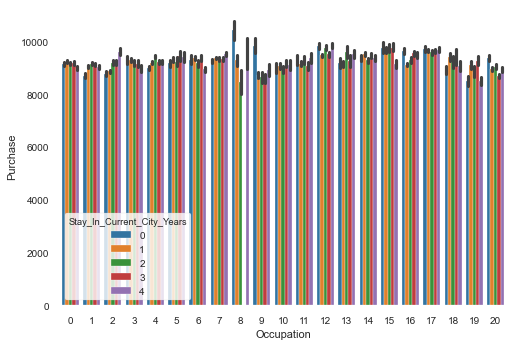

In [87]:
sns.barplot('Occupation','Purchase',hue='Stay_In_Current_City_Years',data=df_i)

<AxesSubplot:xlabel='cat1', ylabel='Purchase'>

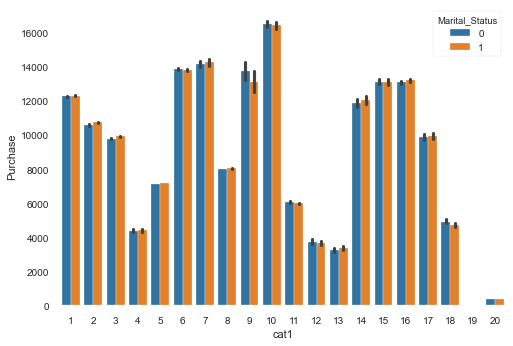

In [88]:
sns.barplot('cat1','Purchase',hue='Marital_Status',data=df_i)

<AxesSubplot:xlabel='cat2', ylabel='Purchase'>

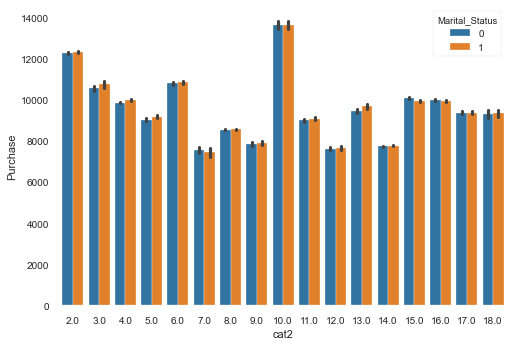

In [89]:
sns.barplot('cat2','Purchase',hue='Marital_Status',data=df_i)

<AxesSubplot:xlabel='cat3', ylabel='Purchase'>

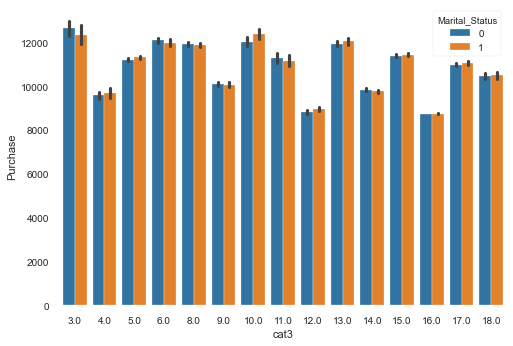

In [90]:
sns.barplot('cat3','Purchase',hue='Marital_Status',data=df_i)

In [104]:
X = df_i.drop('Purchase',axis=1).values # dropping the Purchase column to create features
y = df_i.Purchase.values  # selecting the Purchase column to create labels
print(X.shape)
print(y.shape)

(783667, 10)
(783667,)


In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [106]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(587750, 10)
(587750,)
(195917, 10)
(195917,)


In [107]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [108]:
X_train

array([[ 0.57, -1.11,  1.37, ...,  0.37,  1.17, -0.67],
       [ 0.57, -0.37,  1.37, ...,  0.37,  1.17, -0.67],
       [ 0.57, -1.11, -1.24, ...,  0.37,  1.17, -0.67],
       ...,
       [-1.74, -1.11, -0.63, ...,  0.37,  1.17, -0.67],
       [ 0.57, -1.11, -1.24, ...,  0.37, -0.85, -0.67],
       [-1.74, -1.11, -0.93, ...,  0.37, -0.85, -0.67]])

In [109]:
X_test

array([[ 0.57, -0.37,  0.91, ...,  0.37,  1.17, -0.67],
       [ 0.57, -0.37, -1.24, ...,  0.37, -0.85,  1.49],
       [ 0.57,  0.37,  1.37, ...,  0.37, -0.85, -0.67],
       ...,
       [ 0.57, -1.11, -0.63, ...,  0.37, -0.85,  1.49],
       [-1.75,  1.85, -0.32, ...,  0.37,  1.17, -0.67],
       [ 0.57, -1.85, -1.24, ...,  0.37, -0.85,  1.49]])

In [110]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
y_pred = model.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 7476.46  6003.  ]
 [ 7797.04  4526.  ]
 [ 9246.44  9263.97]
 ...
 [ 8622.71  9263.97]
 [ 9123.15  5358.  ]
 [10258.93 12937.  ]]


In [112]:
from sklearn.metrics import mean_squared_error

In [113]:
print(mean_squared_error(y_pred, y_test))

16030576.755209567


In [114]:
from sklearn.metrics import r2_score

In [115]:
print(r2_score(y_pred, y_test))

-8.608428414630861


In [116]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}

In [118]:
scoring

{'accuracy': make_scorer(accuracy_score), 'prec': 'precision'}

In [121]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)